# Data cleaning and pre-processing

### Importing necessary libraries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# !pip install missingno

# check if this is needed or not

In [153]:
#import missingno as msno
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))

### Downloading the dataset

In [154]:
# Download the dataset using pandas
df = pd.read_csv("./Downloads/netflix_titles.csv")

### Replacing NaN values with 0

In [155]:
# This code is to find any na values
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [156]:
# This code is to count the number of NaN values
total_nan_count = df.isna().sum().sum()
print(total_nan_count)

4307


In [157]:
# This code is to replace all NaN values with 0
Zerodf = df.fillna(0)

Zeronan_df = Zerodf[df.isna().any(axis=1)]
Zeronan_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [158]:
# This code is to show the NaN values after replacing them with 0
no_nan_count = Zeronan_df.isna().sum().sum()
print(no_nan_count)

0


### Finding duplicate rows

In [159]:
duplicateRows = df[df.duplicated()]
duplicateRows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Finding missing values and replacing them

In [160]:
# This code is to find the number of missing values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [161]:
# This code is to find the share of the missing values to the total
# df.isnull().mean()

In [162]:
# This code is to remove the rows with empty values in these 3 columns: date added, rating, and duration
df.dropna(subset=['date_added', 'rating', 'duration'], inplace = True)

In [163]:
# This code is to find the rows with missing values simultaneously in these columns: director, cast, and country. 
# We are counting the number of non-null values in each column for rows in which there are more than 2 NaN values in that row.
# df[df.isnull().sum(axis = 1) > 2].count()

In [164]:
# This code is to fill the NaN values with 'Unknown' since it is not possible to find the real values of these columns

df = df.fillna('Undefined')

In [165]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Removing redundant columns

In [166]:
# This code is to drop the column 'Show Id' as it is not needed in rendering
df = df.drop(columns = df.columns[0], axis = 1)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Undefined,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Undefined,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Undefined,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Undefined,Undefined,Undefined,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Undefined,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,Undefined,Undefined,Undefined,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Data Exploration

In [167]:
# Showing the number of observations and variables, rows and columns
df.shape

(8790, 11)

In [168]:
# Showing the names of each column
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [169]:
# Showing the description of each column, including count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   cast          8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [170]:
# Showing the data type of each column
# print(df.dtypes)

In [92]:
# Assuming df is your DataFrame
# Assuming 'rating' and 'duration' columns are in string format



In [93]:
# Showing a descriptive analysis of all the numerical columns
 # df.describe()

import pandas as pd

def is_numeric(value):
    if value == 'Undefined':
        return False
    try:
        float(value)
        return True
    except (TypeError, ValueError):
        return False

# Assuming df is your DataFrame
for column in df.columns:
    # Identify non-numeric values using a custom function
    is_numeric_mask = df[column].apply(is_numeric)

    # Filter out non-numeric values
    numeric_column = df[column][is_numeric_mask]

    # Check if there are any non-numeric values
    if is_numeric_mask.all():
        # Calculate mean, median, and standard deviation
        column_mean = round(numeric_column.mean(), 2)
        column_median = round(numeric_column.median(), 2)
        column_std = round(numeric_column.std(), 2)

        # Display the statistics
        print(f"\nStatistics for '{column}' column:")
        print(f"Mean: {column_mean}")
        print(f"Median: {column_median}")
        print(f"Standard Deviation: {column_std}")
    else:
        print(f"\n'{column}' column contains non-numeric values (excluding 'Undefined') and will not be processed.")


'type' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'title' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'director' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'cast' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'country' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'date_added' column contains non-numeric values (excluding 'Undefined') and will not be processed.

Statistics for 'release_year' column:
Mean: 2014.18
Median: 2017.0
Standard Deviation: 8.82

'rating' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'duration' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'listed_in' column contains non-numeric values (excluding 'Undefined') and will not be processed.

'description' column contains non-n

In [53]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [91]:
# Showing the frequency of movies and tv shows
types = df['type'].value_counts().reset_index()
types

,type,count
0,Movie,6126
1,TV Show,2664


In [104]:
# Showing the total number of titles
df['title'].nunique()

8790

In [92]:
# Showing the frequency of titles in each country
countries = df['country'].value_counts().reset_index()
countries

,country,count
0,United States,3202
1,India,1008
2,Unknown,829
3,United Kingdom,627
4,Canada,271
...,...,...
82,Namibia,1
83,Senegal,1
84,Luxembourg,1
85,Syria,1


In [94]:
# Showing all the countries of the titles
df['country'].unique()

array(['United States', 'South Africa', 'Unknown', 'India',
       'United Kingdom', 'Germany', 'Mexico', 'Turkey', 'Australia',
       'Finland', 'China', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', 'Argentina', 'Russia', 'Canada',
       'Hong Kong', 'Italy', '', 'Ireland', 'New Zealand', 'Jordan',
       'Colombia', 'Switzerland', 'Israel', 'Brazil', 'Taiwan',
       'Bulgaria', 'Poland', 'Saudi Arabia', 'Thailand', 'Indonesia',
       'Egypt', 'Kuwait', 'Malaysia', 'Vietnam', 'Sweden', 'Lebanon',
       'Romania', 'Philippines', 'Iceland', 'Denmark',
       'United Arab Emirates', 'Netherlands', 'Norway', 'Syria',
       'Mauritius', 'Austria', 'Czech Republic', 'Cameroon', 'Uruguay',
       'Kenya', 'Chile', 'Luxembourg', 'Bangladesh', 'Portugal',
       'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia', 'Peru',
       'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe', 'Puerto Rico',
       'Pakistan', 'Cyprus', 'Paraguay', 'Croatia', 'Cambodia', 'Georg

In [96]:
# Showing the total number of countries
df['country'].nunique()

87

In [97]:
# Showing the names of the direcots
df['director'].unique()

array(['Kirsten Johnson', 'Unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [98]:
# Showing the total number of directors
df['director'].nunique()

4527

In [106]:
# Showing the number of titles by each director 
directors = df['director'].value_counts().reset_index()
directors

,director,count
0,Unknown,2621
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4522,"Raymie Muzquiz, Stu Livingston",1
4523,Joe Menendez,1
4524,Eric Bross,1
4525,Will Eisenberg,1


In [107]:
# Showing the number of titles by each rating 
ratings = df['rating'].value_counts().reset_index()
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [108]:
# Showing the number of titles in the genres they are listed in
listedins = df['listed_in'].value_counts().reset_index()
listedins

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
...,...,...
508,"Crime TV Shows, International TV Shows, TV Sci...",1
509,"International TV Shows, TV Horror, TV Sci-Fi &...",1
510,"Crime TV Shows, Kids' TV",1
511,"Horror Movies, International Movies, Sci-Fi & ...",1


In [110]:
# Showing the total number of 'listed in's
df['listed_in'].nunique()

513

In [109]:
# Showing the number of titles in each genre
lists = df['list'].value_counts().reset_index()
lists

,list,count
0,Dramas,1599
1,Comedies,1210
2,Action & Adventure,859
3,Documentaries,829
4,International TV Shows,773
5,Children & Family Movies,605
6,Crime TV Shows,399
7,Kids' TV,385
8,Stand-Up Comedy,334
9,Horror Movies,275


In [112]:
# Showing the total number of different genres
df['list'].nunique()

36

# Data Visualisation

## Preparing data for visualisation

In [45]:
# This code is to change the date_added column's format to YYYY-MM-DD to make it easier for visualisation. "Explain coerce"
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

In [46]:
# This code is to check whether the format has changed
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [47]:
# 
import re

In [50]:
#
df['duration'] = df['duration'].apply(lambda x: int(re.sub(r'\D','', x)))

In [48]:
# 
df['country'] = df['country'].str.split(',').str[0]

In [49]:
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [51]:
# This code is to seperate the listed_in column and find out popular genres.
#We split the "listed_in" column. As separator ",". Leave the first element in the column.
df['list'] = df['listed_in'].str.split(',').str[0]                

In [52]:
sa = df['listed_in'].str.cat(sep = ',').split(',')                
#We combine all the values of the column and then convert to a list using a delimiter.

In [53]:
sa = [text.strip() for text in sa]                                
#A list generator that iterates through each element of sa and applies the strip() method to each element. The strip() method removes spaces from the beginning and end of a string.

In [54]:
res = {i: sa.count(i) for i in set(sa)}                           
#We create a dictionary res where the keys are the unique values ​​in the sa list and the values ​​are the number of times each value occurs in the sa list.

In [55]:
listed_df = pd.DataFrame(res, index = [0])                        
#Create a DataFrame

In [56]:
listed_df = listed_df.T                                           
#Transpose

In [57]:
listed_df.rename(columns = {0:'Count'}, inplace = True)           
#Rename the column with quantity. Zero index because the genre is now as an index.

In [58]:
listed_df.reset_index(inplace = True)                             
#Resetting the index

In [59]:
listed_df = listed_df.sort_values(by=['Count'], ascending=False)  
# Sort values in descending order

In [60]:
listed_df.head(5)

,index,Count
27,International Movies,2752
20,Dramas,2426
17,Comedies,1674
34,International TV Shows,1349
4,Documentaries,869


In [62]:
# We will delete cast and description columns as no visualisation will be done on them
df = df.drop(['cast','description'], axis = 1)

In [63]:
df

,type,title,director,country,date_added,release_year,rating,duration,listed_in,list
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,Documentaries
1,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,TV Show,Ganglands,Julien Leclercq,Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV",Docuseries
4,TV Show,Kota Factory,Unknown,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers",Cult Movies
8803,TV Show,Zombie Dumb,Unknown,Unknown,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies",Kids' TV
8804,Movie,Zombieland,Ruben Fleischer,United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Comedies
8805,Movie,Zoom,Peter Hewitt,United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies",Children & Family Movies


In [64]:
# We will extract the year from the date_added column to make the visualisation simpler
df['added_year'] = df['date_added'].dt.year

In [65]:
df.head(10)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,list,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,Documentaries,2021.0
1,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,2021.0
2,TV Show,Ganglands,Julien Leclercq,Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,2021.0
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV",Docuseries,2021.0
4,TV Show,Kota Factory,Unknown,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,2021.0
5,TV Show,Midnight Mass,Mike Flanagan,Unknown,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,2021.0
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Children & Family Movies,2021.0
7,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",Dramas,2021.0
8,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",British TV Shows,2021.0
9,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",Comedies,2021.0


### Performing data visualisation

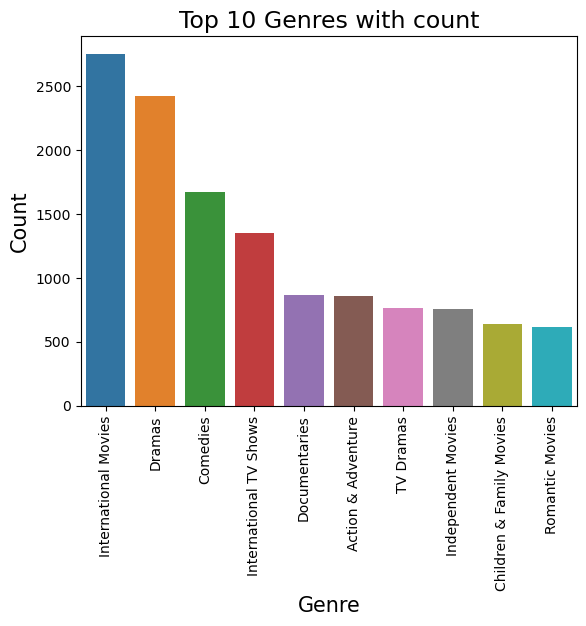

In [66]:
# We will display the top 10 genres by frequency of use
sns.barplot(x='index', y='Count', data=listed_df[:10])
plt.title('Top 10 Genres with count', fontsize=17)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

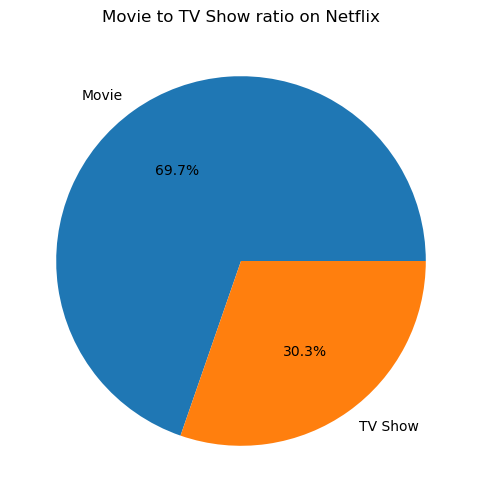

In [67]:
# We will display the ratio of movies to tv shows available on Netflix
plt.figure(figsize=(6, 6))
plt.pie(df.groupby('type').size(), labels=df['type'].unique(), autopct='%1.1f%%')
plt.title('Movie to TV Show ratio on Netflix')
plt.show()

/Users/eshitashah/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


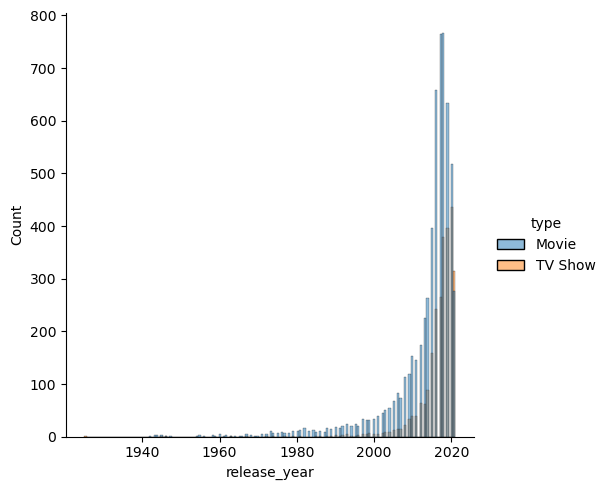

In [73]:
# We will display the distribution of tv shows and movies based on their year of release
sns.displot(df, x='release_year', hue='type')

/Users/eshitashah/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


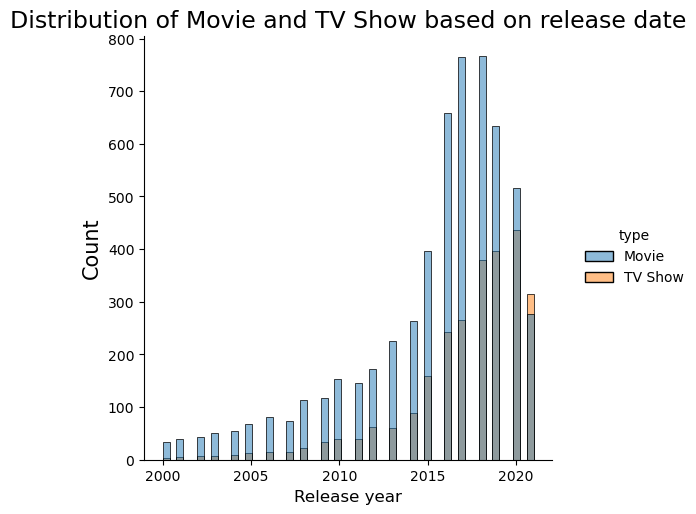

In [75]:
# We will display the same distribution as above but only for our current century as the past years have very 
# few releases and are not needed
xre = df[df['release_year']>=2000]
sns.displot(xre, x='release_year', hue='type')
plt.title('Distribution of Movie and TV Show based on release date', fontsize=17)
plt.xlabel('Release year', fontsize=12)
plt.ylabel('Count', fontsize=15)
plt.show()

In [77]:
# We will create a separate dataframe to show the number of tv shows in terms of seasons
tv_show = df[df['type']=='TV Show']
duration_tv_show = tv_show.groupby(['duration', 'type'])['type'].count().sort_values(ascending = False).reset_index(name='duration_count')

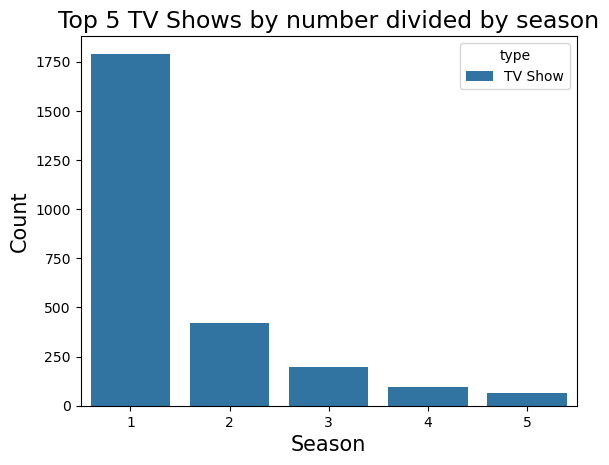

In [78]:
# We will display the top 5 tv shows in terms of number of seasons
sns.barplot(x='duration', y='duration_count', data=duration_tv_show[:5], hue='type')
plt.title('Top 5 TV Shows by number divided by season', fontsize=17)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

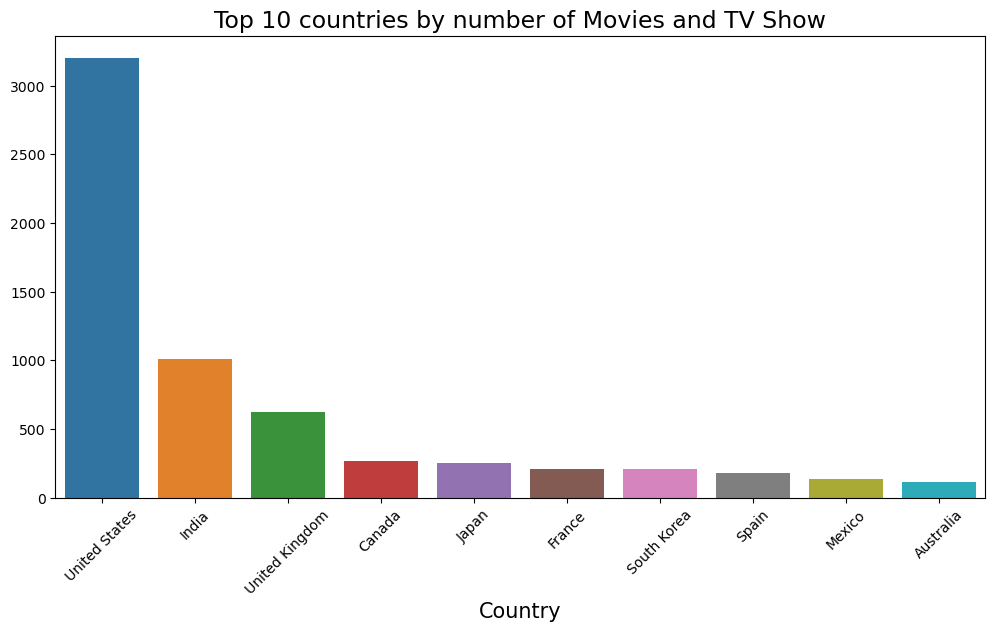

In [84]:
# top 10 countries by number of movies and tv shows, hiding the unknowns 
unknown_country_del=df[df['country'] != 'Unknown']
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=unknown_country_del, order=unknown_country_del['country'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 countries by number of Movies and TV Show', fontsize=17)
plt.xlabel('Country', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()